In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [0]:
df = pd.read_csv('train.csv')
print(df.shape)
df.head()

(9324, 40)


,Unnamed: 0,WellID,FirstMonthOil,FirstMonthGas,FirstMonthRatioGasOil,FirstMonthWater,firstMonthPercentWater,FirstMonthDaysOn,SecondMonthOil,SecondMonthGas,SecondMonthRatioGasOil,SecondMonthWater,SecondMonthPercentWater,SecondMonthDaysOn,ThirdMonthOil,ThirdMonthGas,ThirdMonthRatioGasOil,ThirdMonthWater,ThirdMonthPercentWater,ThirdMonthDaysOn,FourthMonthOil,FourthMonthGas,FourthMonthRatioGasOil,FourthMonthWater,FourthMonthPercentWater,FourthMonthDaysOn,FifthMonthOil,FifthMonthGas,FifthMonthRatioGasOil,FifthMonthWater,FifthMonthPercentWater,FifthMonthDaysOn,SixthMonthOil,SixthMonthGas,SixthMonthRatioGasOil,SixthMonthWater,SixthMonthPercentWater,SixthMonthDaysOn,TotalOilInNext6Months,TotalGasInNext6Months
0,3,5343,22672.0,3818.0,0.168402,14759.0,0.650979,30.0,12766.0,2308.0,0.180793,7921.0,0.620476,28.0,4990.0,607.0,0.121643,2330.0,0.466934,10.0,11002.0,1419.0,0.128977,6576.0,0.597710,31.0,7141.0,506.0,0.070858,4451.0,0.623302,22.0,6516.0,479.0,0.073511,4075.0,0.625384,27.0,61152.0,5893.0
1,4,5663,7919.0,4328.0,0.546534,5278.0,0.666498,20.0,5082.0,2779.0,0.546832,2402.0,0.472649,28.0,3168.0,540.0,0.170455,1683.0,0.531250,25.0,2774.0,283.0,0.102019,1172.0,0.422495,30.0,1925.0,378.0,0.196364,782.0,0.406234,24.0,2015.0,1195.0,0.593052,796.0,0.395037,23.0,13172.0,7529.0
2,8,7697,18653.0,0.0,0.000000,9585.0,0.513858,30.0,13372.0,23154.0,1.731529,0.0,0.000000,31.0,12189.0,19935.0,1.635491,3665.0,0.300681,30.0,10034.0,16316.0,1.626071,2913.0,0.290313,31.0,11982.0,23337.0,1.947672,4137.0,0.345268,30.0,9070.0,18020.0,1.986770,3102.0,0.342007,31.0,32858.0,57060.0
3,9,7394,19784.0,33837.0,1.710321,9433.0,0.476799,30.0,17166.0,27167.0,1.582605,6641.0,0.386869,31.0,16525.0,22777.0,1.378336,5927.0,0.358669,30.0,13113.0,18209.0,1.388622,4568.0,0.348357,31.0,9202.0,11550.0,1.255162,3504.0,0.380787,31.0,6102.0,8675.0,1.421665,2145.0,0.351524,18.0,31784.0,45579.0
4,10,7318,16157.0,21461.0,1.328279,7529.0,0.465990,30.0,12263.0,14664.0,1.195792,5728.0,0.467096,31.0,11019.0,14039.0,1.274072,4518.0,0.410019,30.0,14154.0,19746.0,1.395083,5486.0,0.387594,31.0,4046.0,4337.0,1.071923,1627.0,0.402126,14.0,0.0,2941.0,0.000000,0.0,0.000000,1.0,40715.0,59066.0


In [0]:
x = pd.concat([df.loc[:,"FirstMonthOil":"SixthMonthDaysOn"], df.loc[:,"TotalGasInNext6Months"]], axis = 1)

In [0]:
y = df.loc[:,"TotalOilInNext6Months"]

In [0]:
#normalize data

df_normalized = x.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
df_normalized = min_max_scaler.fit_transform(df_normalized)
df_norm = pd.DataFrame(df_normalized)
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,0.351509,0.008018,0.000003,0.010168,0.001234,0.967742,0.232999,0.004792,0.000002,0.006456,0.003665,0.903226,0.094770,0.001536,0.000003,0.002117,0.003311,0.322581,0.234384,0.003691,0.000008,0.006779,0.002773,1.000000,0.195462,0.001401,0.000001,0.005393,0.004810,0.709677,0.163587,0.001453,0.000002,0.006270,0.004254,0.870968,0.005040
1,0.122777,0.009089,0.000010,0.003636,0.001263,0.645161,0.092754,0.005770,0.000005,0.001958,0.002792,0.903226,0.060166,0.001367,0.000005,0.001529,0.003768,0.806452,0.059097,0.000736,0.000007,0.001208,0.001960,0.967742,0.052691,0.001047,0.000004,0.000947,0.003135,0.774194,0.050587,0.003624,0.000013,0.001225,0.002687,0.741935,0.006440
2,0.289198,0.000000,0.000000,0.006604,0.000974,0.967742,0.244059,0.048074,0.000015,0.000000,0.000000,1.000000,0.231492,0.050447,0.000045,0.003331,0.002132,0.967742,0.213762,0.042438,0.000107,0.003003,0.001347,1.000000,0.327968,0.064618,0.000037,0.005012,0.002664,0.967742,0.227706,0.054643,0.000043,0.004773,0.002327,1.000000,0.048803
3,0.306733,0.071060,0.000031,0.006499,0.000904,0.967742,0.313305,0.056406,0.000014,0.005413,0.002285,1.000000,0.313841,0.057639,0.000038,0.005386,0.002544,0.967742,0.279357,0.047362,0.000091,0.004709,0.001616,1.000000,0.251875,0.031981,0.000024,0.004245,0.002938,1.000000,0.153193,0.026306,0.000031,0.003301,0.002391,0.580645,0.038984
4,0.250500,0.045069,0.000024,0.005187,0.000883,0.967742,0.223818,0.030446,0.000010,0.004669,0.002759,1.000000,0.209272,0.035527,0.000035,0.004106,0.002908,0.967742,0.301534,0.051359,0.000092,0.005656,0.001798,1.000000,0.110746,0.012009,0.000020,0.001971,0.003103,0.451613,0.000000,0.008918,0.000000,0.000000,0.000000,0.032258,0.050519


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


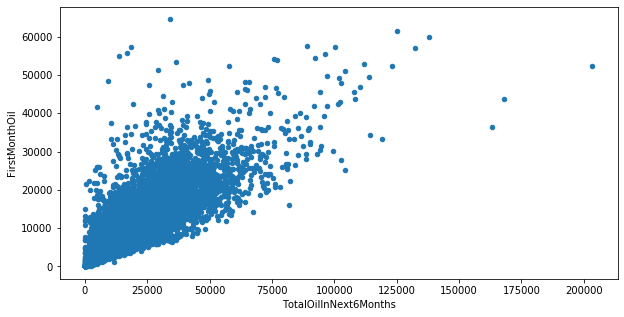

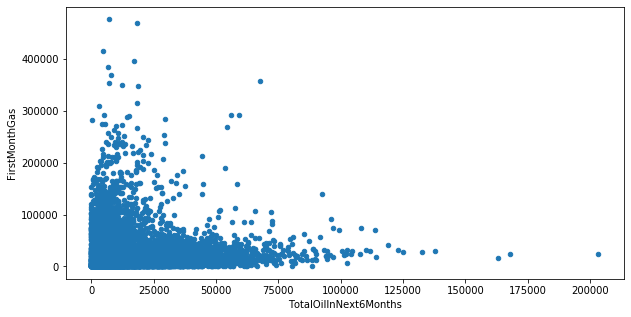

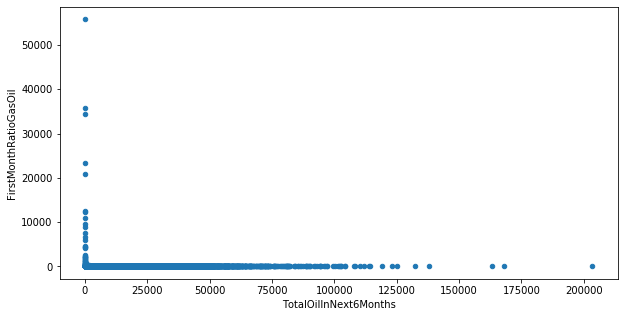

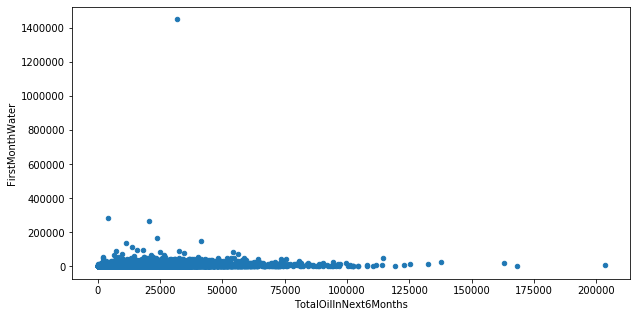

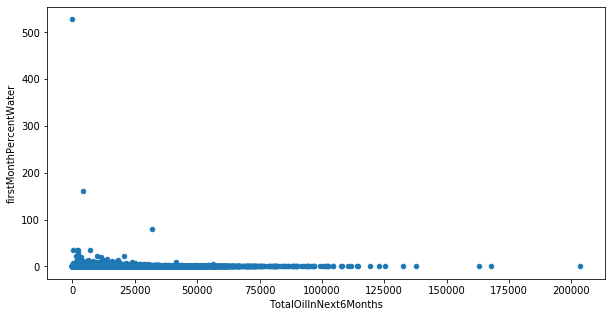

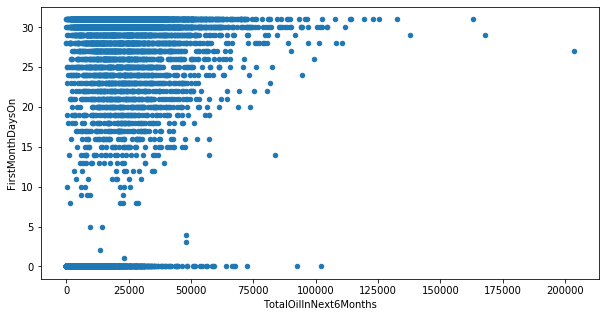

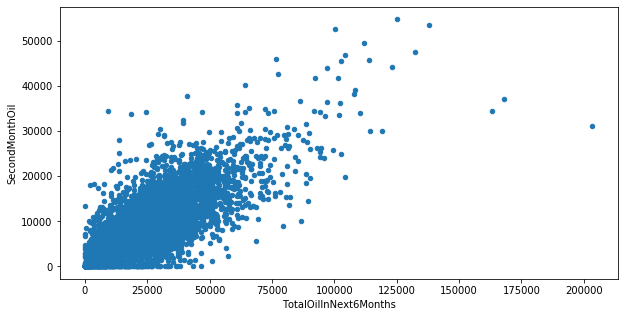

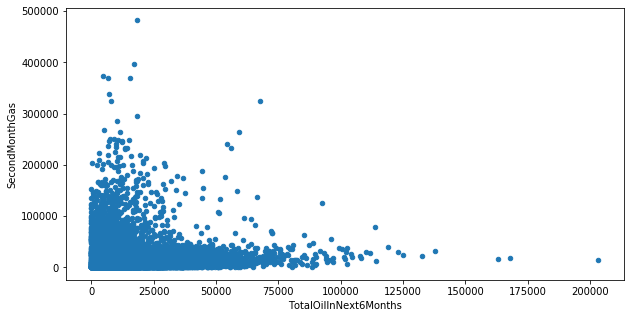

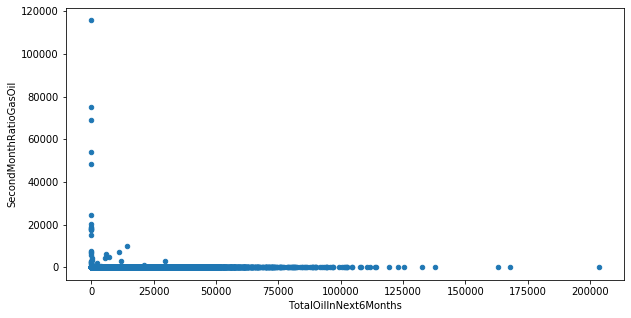

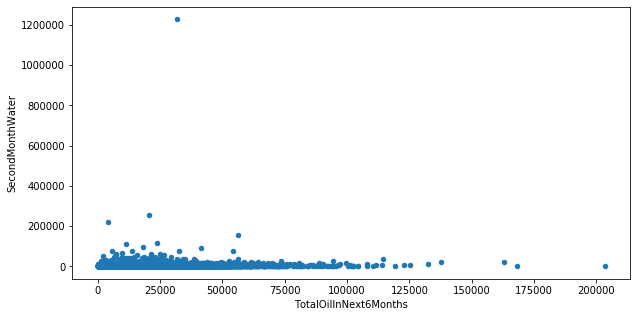

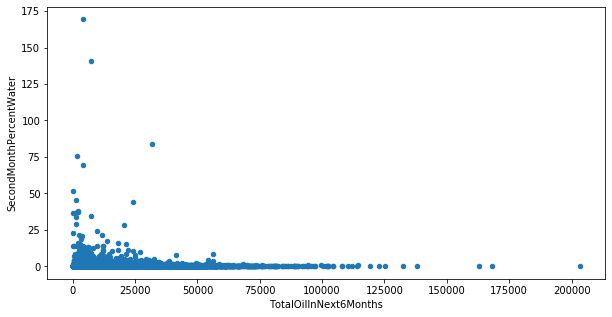

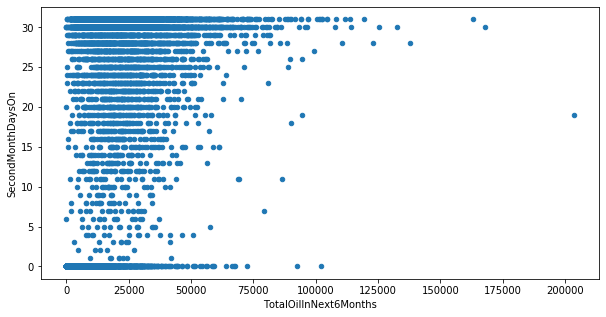

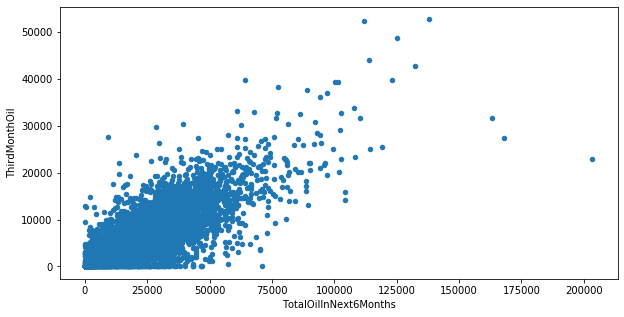

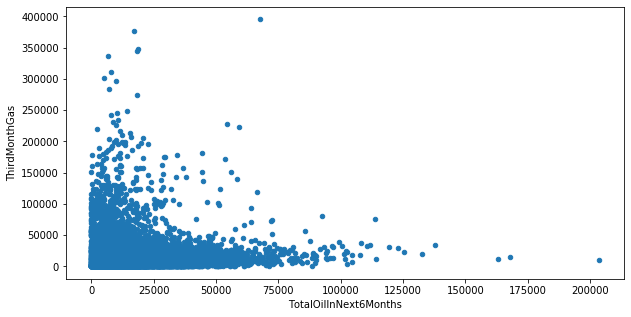

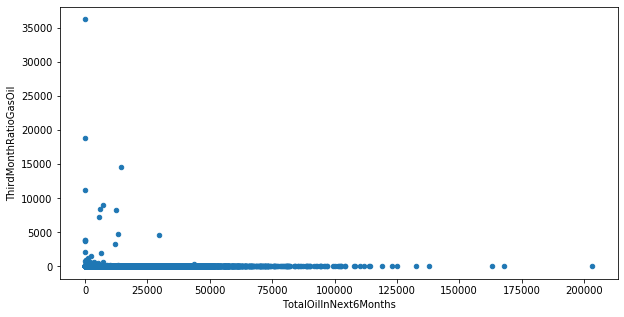

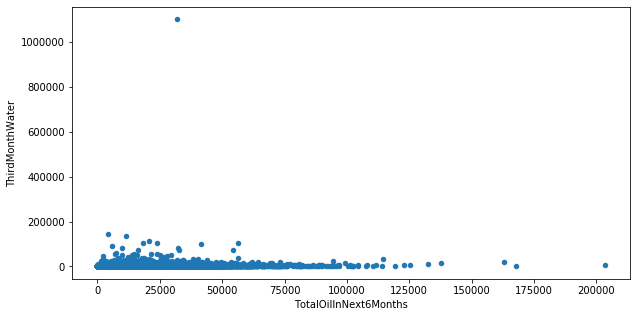

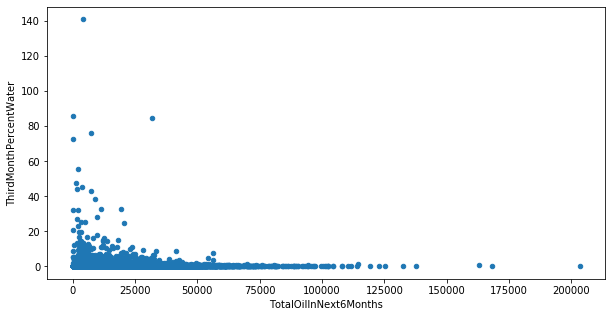

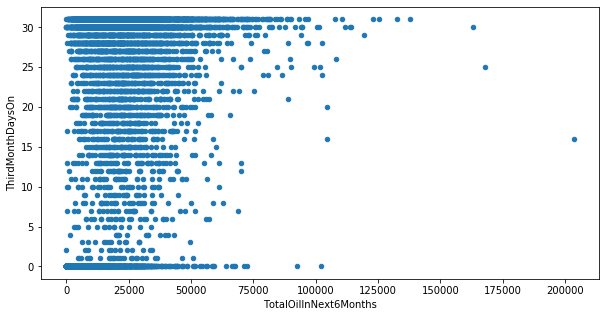

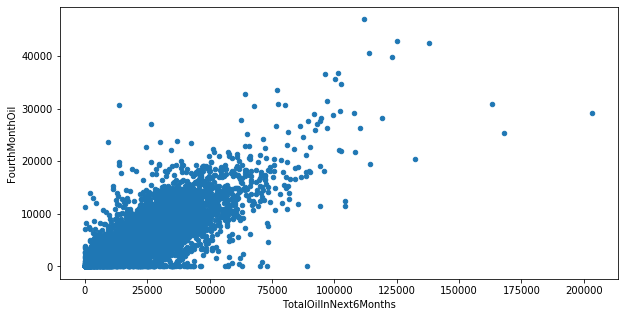

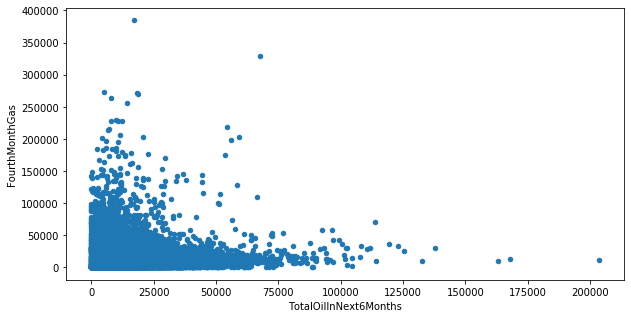

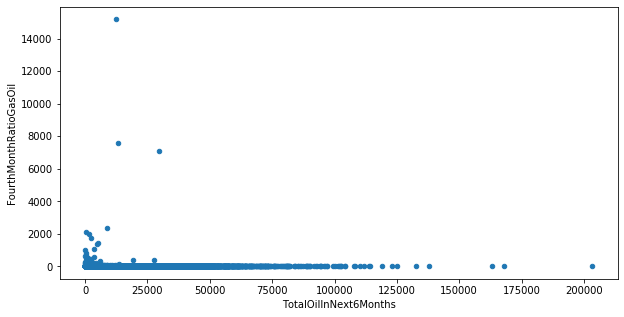

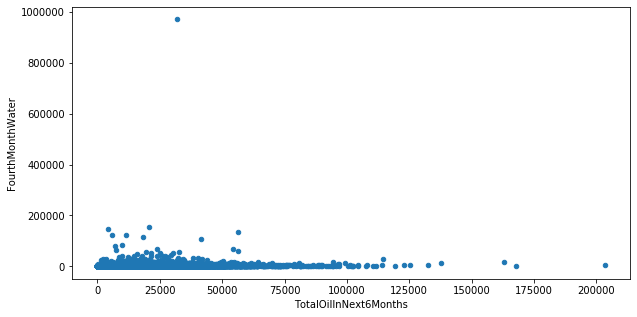

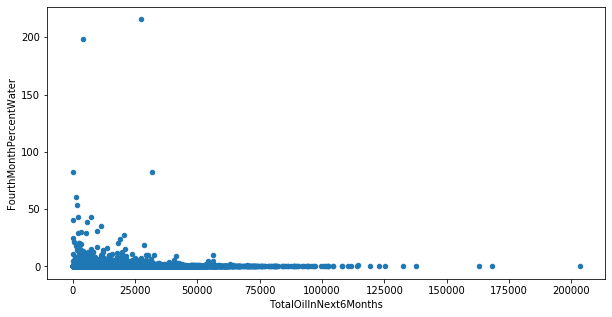

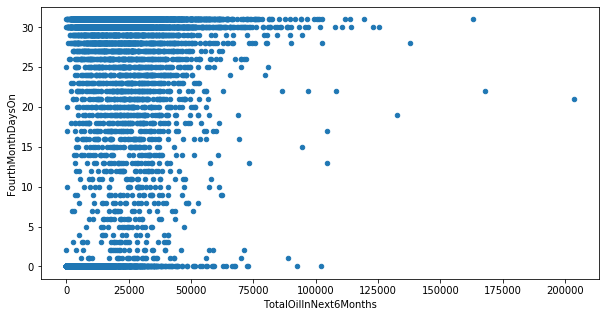

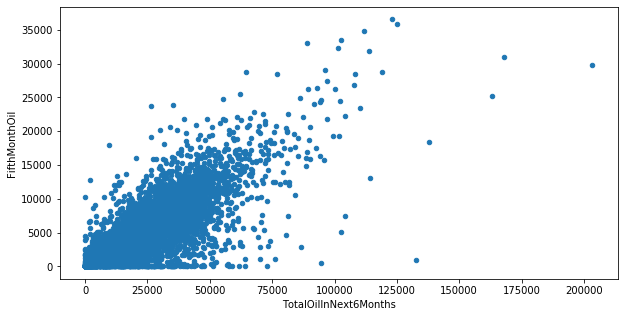

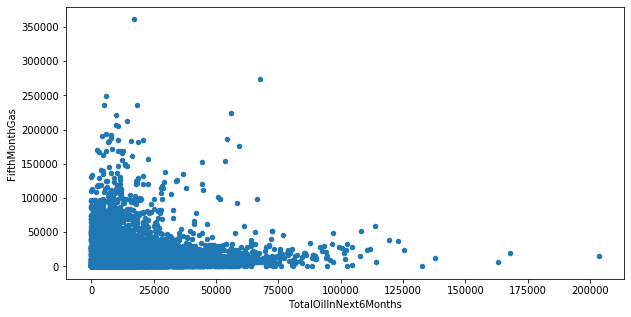

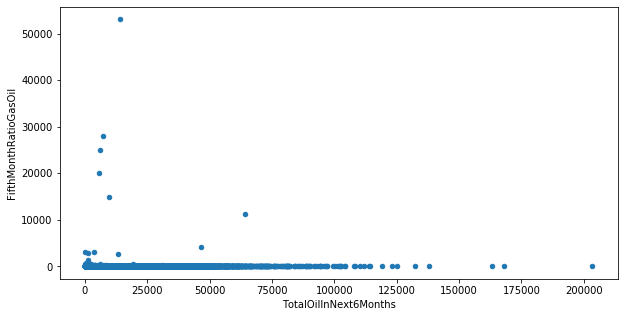

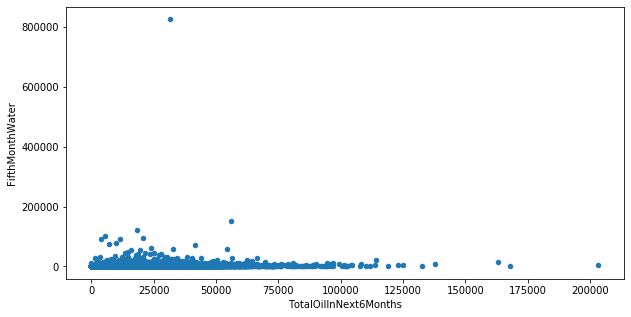

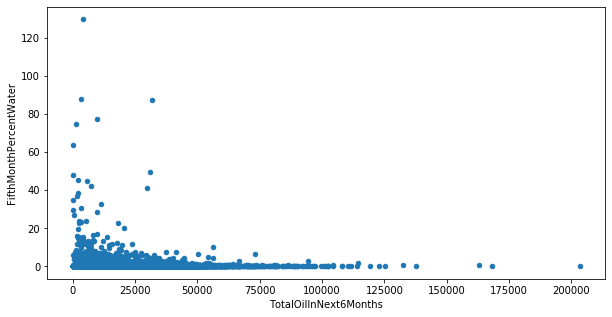

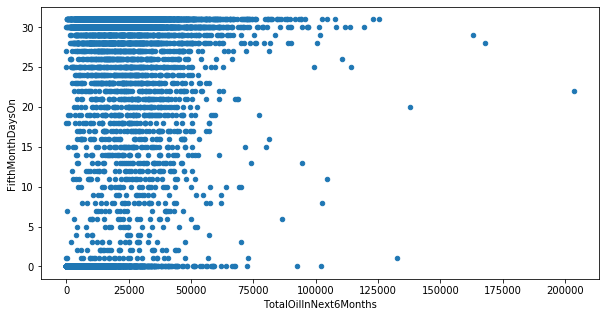

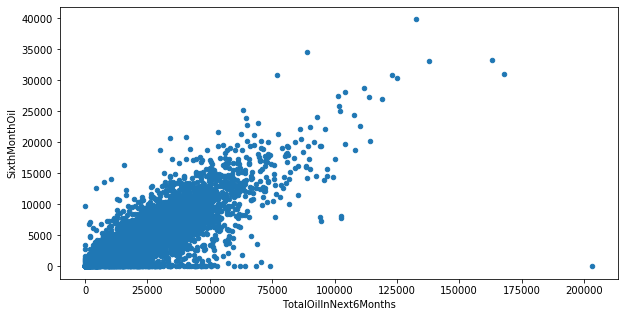

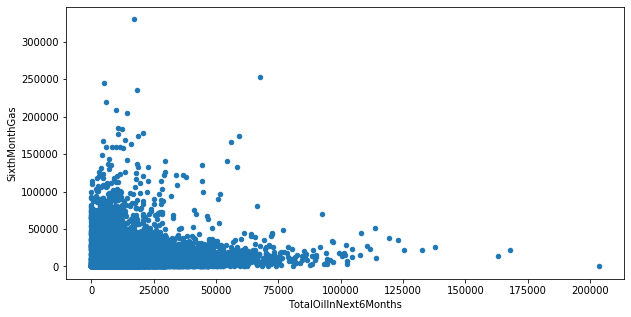

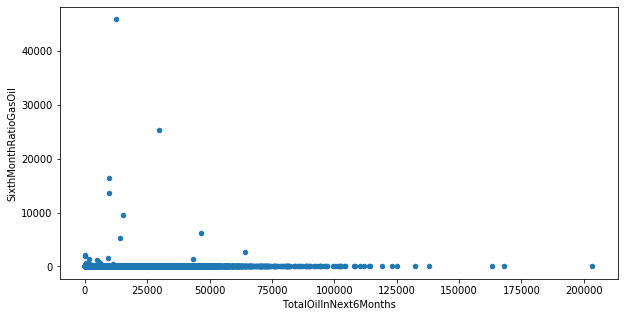

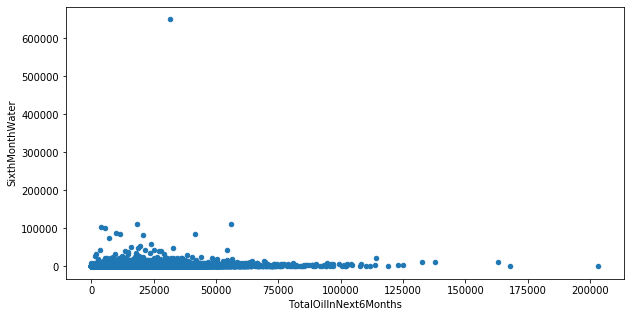

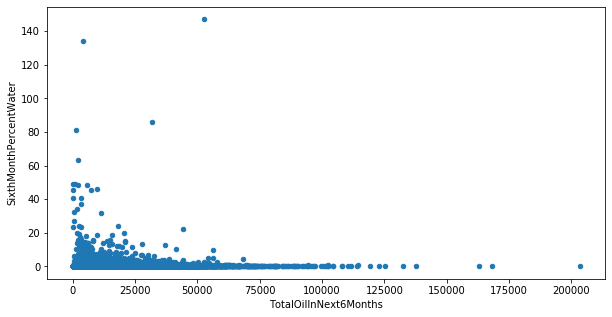

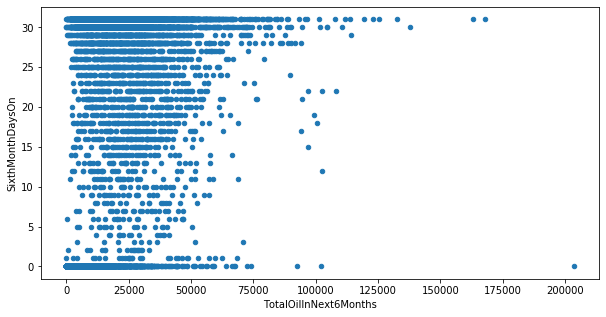

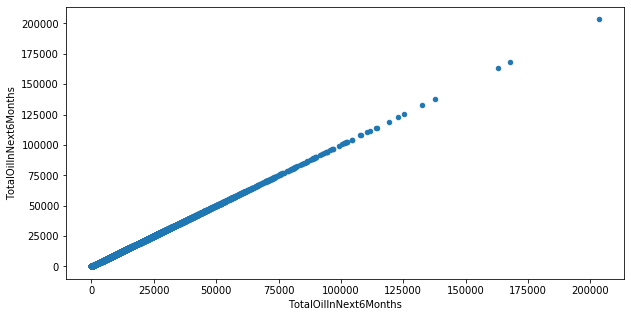

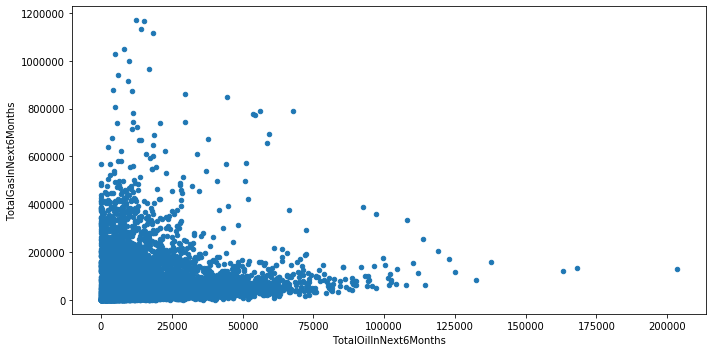

In [0]:
plt.rcParams["figure.figsize"] = (10,5)
for i in range(2, 40):
  df.plot(x="TotalOilInNext6Months", y=i, subplots=True, kind='scatter')
plt.tight_layout()
plt.show()

In [0]:
plt.rcParams["figure.figsize"] = (10,5)
for i in range(2, 40):
  df_norm.plot(x=38, y=i, subplots=True, kind='scatter')
plt.tight_layout()
plt.show()

In [0]:
x.head()

,FirstMonthOil,FirstMonthGas,FirstMonthRatioGasOil,FirstMonthWater,firstMonthPercentWater,FirstMonthDaysOn,SecondMonthOil,SecondMonthGas,SecondMonthRatioGasOil,SecondMonthWater,SecondMonthPercentWater,SecondMonthDaysOn,ThirdMonthOil,ThirdMonthGas,ThirdMonthRatioGasOil,ThirdMonthWater,ThirdMonthPercentWater,ThirdMonthDaysOn,FourthMonthOil,FourthMonthGas,FourthMonthRatioGasOil,FourthMonthWater,FourthMonthPercentWater,FourthMonthDaysOn,FifthMonthOil,FifthMonthGas,FifthMonthRatioGasOil,FifthMonthWater,FifthMonthPercentWater,FifthMonthDaysOn,SixthMonthOil,SixthMonthGas,SixthMonthRatioGasOil,SixthMonthWater,SixthMonthPercentWater,SixthMonthDaysOn,TotalGasInNext6Months
0,22672.0,3818.0,0.168402,14759.0,0.650979,30.0,12766.0,2308.0,0.180793,7921.0,0.620476,28.0,4990.0,607.0,0.121643,2330.0,0.466934,10.0,11002.0,1419.0,0.128977,6576.0,0.597710,31.0,7141.0,506.0,0.070858,4451.0,0.623302,22.0,6516.0,479.0,0.073511,4075.0,0.625384,27.0,5893.0
1,7919.0,4328.0,0.546534,5278.0,0.666498,20.0,5082.0,2779.0,0.546832,2402.0,0.472649,28.0,3168.0,540.0,0.170455,1683.0,0.531250,25.0,2774.0,283.0,0.102019,1172.0,0.422495,30.0,1925.0,378.0,0.196364,782.0,0.406234,24.0,2015.0,1195.0,0.593052,796.0,0.395037,23.0,7529.0
2,18653.0,0.0,0.000000,9585.0,0.513858,30.0,13372.0,23154.0,1.731529,0.0,0.000000,31.0,12189.0,19935.0,1.635491,3665.0,0.300681,30.0,10034.0,16316.0,1.626071,2913.0,0.290313,31.0,11982.0,23337.0,1.947672,4137.0,0.345268,30.0,9070.0,18020.0,1.986770,3102.0,0.342007,31.0,57060.0
3,19784.0,33837.0,1.710321,9433.0,0.476799,30.0,17166.0,27167.0,1.582605,6641.0,0.386869,31.0,16525.0,22777.0,1.378336,5927.0,0.358669,30.0,13113.0,18209.0,1.388622,4568.0,0.348357,31.0,9202.0,11550.0,1.255162,3504.0,0.380787,31.0,6102.0,8675.0,1.421665,2145.0,0.351524,18.0,45579.0
4,16157.0,21461.0,1.328279,7529.0,0.465990,30.0,12263.0,14664.0,1.195792,5728.0,0.467096,31.0,11019.0,14039.0,1.274072,4518.0,0.410019,30.0,14154.0,19746.0,1.395083,5486.0,0.387594,31.0,4046.0,4337.0,1.071923,1627.0,0.402126,14.0,0.0,2941.0,0.000000,0.0,0.000000,1.0,59066.0


In [0]:
x.shape

(9324, 37)

In [0]:
y = df.loc[:,"TotalOilInNext6Months"]

In [0]:
y.head()

0    61152.0
1    13172.0
2    32858.0
3    31784.0
4    40715.0
Name: TotalOilInNext6Months, dtype: float64

In [0]:
y.shape

(9324,)

In [0]:
monthsOilList = [df.loc[:, "FirstMonthOil"],df.loc[:, "SecondMonthOil"],df.loc[:, "ThirdMonthOil"],df.loc[:, "FourthMonthOil"],df.loc[:, "FifthMonthOil"],df.loc[:, "SixthMonthOil"]]
monthsOil = pd.concat(monthsOilList, axis = 1)

In [0]:
monthsOil

,FirstMonthOil,SecondMonthOil,ThirdMonthOil,FourthMonthOil,FifthMonthOil,SixthMonthOil
0,22672.0,12766.0,4990.0,11002.0,7141.0,6516.0
1,7919.0,5082.0,3168.0,2774.0,1925.0,2015.0
2,18653.0,13372.0,12189.0,10034.0,11982.0,9070.0
3,19784.0,17166.0,16525.0,13113.0,9202.0,6102.0
4,16157.0,12263.0,11019.0,14154.0,4046.0,0.0
...,...,...,...,...,...,...
9319,37805.0,24502.0,29670.0,18470.0,10449.0,7049.0
9320,6971.0,5939.0,6785.0,5650.0,5296.0,4684.0
9321,8664.0,5714.0,4295.0,3065.0,2360.0,2805.0
9322,26931.0,15673.0,10322.0,7962.0,6763.0,7109.0


In [0]:
monthsOilComp = pd.concat([df.loc[:,"TotalOilInNext6Months"], monthsOil], axis = 1)

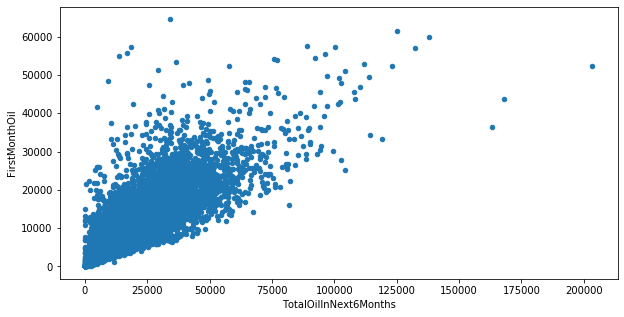

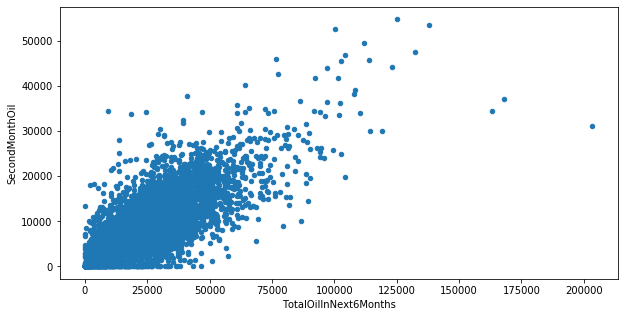

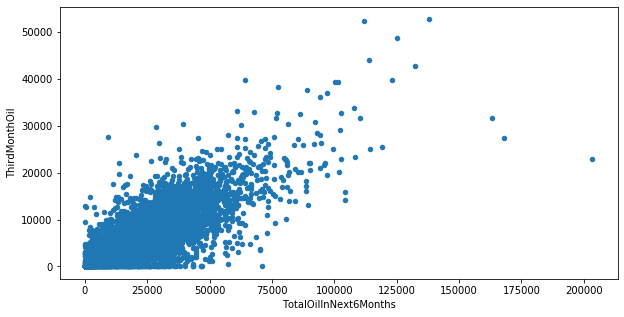

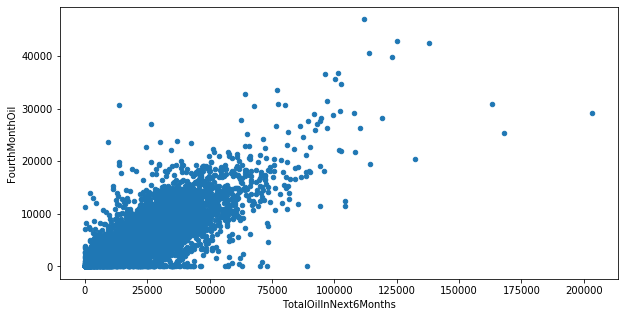

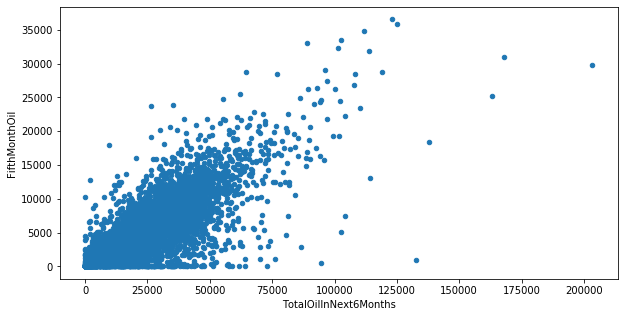

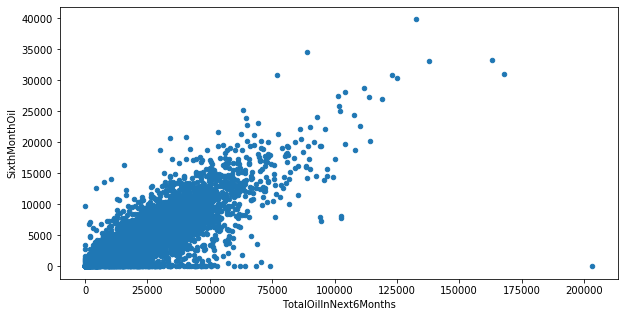

In [0]:
for i in range(1, monthsOilComp.shape[1]):
  monthsOilComp.plot(x=0,y=i,kind='scatter',figsize=(10,5))
  plt.show()

In [0]:
x

,FirstMonthGas,FirstMonthRatioGasOil,FirstMonthWater,firstMonthPercentWater,FirstMonthDaysOn,SecondMonthOil,SecondMonthGas,SecondMonthRatioGasOil,SecondMonthWater,SecondMonthPercentWater,SecondMonthDaysOn,ThirdMonthOil,ThirdMonthGas,ThirdMonthRatioGasOil,ThirdMonthWater,ThirdMonthPercentWater,ThirdMonthDaysOn,FourthMonthOil,FourthMonthGas,FourthMonthRatioGasOil,FourthMonthWater,FourthMonthPercentWater,FourthMonthDaysOn,FifthMonthOil,FifthMonthGas,FifthMonthRatioGasOil,FifthMonthWater,FifthMonthPercentWater,FifthMonthDaysOn,SixthMonthOil,SixthMonthGas,SixthMonthRatioGasOil,SixthMonthWater,SixthMonthPercentWater,SixthMonthDaysOn,TotalGasInNext6Months
0,3818.0,0.168402,14759.0,0.650979,30.0,12766.0,2308.0,0.180793,7921.0,0.620476,28.0,4990.0,607.0,0.121643,2330.0,0.466934,10.0,11002.0,1419.0,0.128977,6576.0,0.597710,31.0,7141.0,506.0,0.070858,4451.0,0.623302,22.0,6516.0,479.0,0.073511,4075.0,0.625384,27.0,5893.0
1,4328.0,0.546534,5278.0,0.666498,20.0,5082.0,2779.0,0.546832,2402.0,0.472649,28.0,3168.0,540.0,0.170455,1683.0,0.531250,25.0,2774.0,283.0,0.102019,1172.0,0.422495,30.0,1925.0,378.0,0.196364,782.0,0.406234,24.0,2015.0,1195.0,0.593052,796.0,0.395037,23.0,7529.0
2,0.0,0.000000,9585.0,0.513858,30.0,13372.0,23154.0,1.731529,0.0,0.000000,31.0,12189.0,19935.0,1.635491,3665.0,0.300681,30.0,10034.0,16316.0,1.626071,2913.0,0.290313,31.0,11982.0,23337.0,1.947672,4137.0,0.345268,30.0,9070.0,18020.0,1.986770,3102.0,0.342007,31.0,57060.0
3,33837.0,1.710321,9433.0,0.476799,30.0,17166.0,27167.0,1.582605,6641.0,0.386869,31.0,16525.0,22777.0,1.378336,5927.0,0.358669,30.0,13113.0,18209.0,1.388622,4568.0,0.348357,31.0,9202.0,11550.0,1.255162,3504.0,0.380787,31.0,6102.0,8675.0,1.421665,2145.0,0.351524,18.0,45579.0
4,21461.0,1.328279,7529.0,0.465990,30.0,12263.0,14664.0,1.195792,5728.0,0.467096,31.0,11019.0,14039.0,1.274072,4518.0,0.410019,30.0,14154.0,19746.0,1.395083,5486.0,0.387594,31.0,4046.0,4337.0,1.071923,1627.0,0.402126,14.0,0.0,2941.0,0.000000,0.0,0.000000,1.0,59066.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9319,141684.0,3.747758,0.0,0.000000,0.0,24502.0,129800.0,5.297527,0.0,0.000000,0.0,29670.0,161577.0,5.445804,0.0,0.000000,0.0,18470.0,153543.0,8.313102,0.0,0.000000,0.0,10449.0,117086.0,11.205474,14724.0,1.409130,0.0,7049.0,103901.0,14.739821,13066.0,1.853596,0.0,415857.0
9320,79098.0,11.346722,98772.0,14.168986,0.0,5939.0,77001.0,12.965314,96153.0,16.190099,0.0,6785.0,82864.0,12.212822,103475.0,15.250553,0.0,5650.0,93783.0,16.598761,117110.0,20.727434,0.0,5296.0,97524.0,18.414653,121781.0,22.994902,0.0,4684.0,89202.0,19.043980,111389.0,23.780743,0.0,358299.0
9321,81608.0,9.419206,34793.0,4.015813,0.0,5714.0,69275.0,12.123731,29535.0,5.168883,0.0,4295.0,64364.0,14.985797,27441.0,6.389057,0.0,3065.0,57058.0,18.615987,24326.0,7.936705,0.0,2360.0,44125.0,18.697034,18812.0,7.971186,0.0,2805.0,48556.0,17.310517,20701.0,7.380036,0.0,84621.0
9322,175372.0,6.511901,69916.0,2.596116,0.0,15673.0,143948.0,9.184457,57388.0,3.661584,0.0,10322.0,105391.0,10.210327,42016.0,4.070529,0.0,7962.0,80884.0,10.158754,32246.0,4.049987,0.0,6763.0,60348.0,8.923259,24059.0,3.557445,0.0,7109.0,62883.0,8.845548,25070.0,3.526516,0.0,288955.0


In [0]:
y

0       61152.0
1       13172.0
2       32858.0
3       31784.0
4       40715.0
         ...   
9319    28370.0
9320    18231.0
9321     9154.0
9322    26487.0
9323    20723.0
Name: TotalOilInNext6Months, Length: 9324, dtype: float64

In [0]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(x.values, y.values, test_size = 0.25, random_state = 42)

In [0]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (6993, 36)
Training Labels Shape: (6993,)
Testing Features Shape: (2331, 36)
Testing Labels Shape: (2331,)


In [0]:
train_features.max()

1169180.0

In [0]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [0]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 3312.32


In [0]:
x.describe()

,FirstMonthGas,FirstMonthRatioGasOil,FirstMonthWater,firstMonthPercentWater,FirstMonthDaysOn,SecondMonthOil,SecondMonthGas,SecondMonthRatioGasOil,SecondMonthWater,SecondMonthPercentWater,SecondMonthDaysOn,ThirdMonthOil,ThirdMonthGas,ThirdMonthRatioGasOil,ThirdMonthWater,ThirdMonthPercentWater,ThirdMonthDaysOn,FourthMonthOil,FourthMonthGas,FourthMonthRatioGasOil,FourthMonthWater,FourthMonthPercentWater,FourthMonthDaysOn,FifthMonthOil,FifthMonthGas,FifthMonthRatioGasOil,FifthMonthWater,FifthMonthPercentWater,FifthMonthDaysOn,SixthMonthOil,SixthMonthGas,SixthMonthRatioGasOil,SixthMonthWater,SixthMonthPercentWater,SixthMonthDaysOn,TotalGasInNext6Months
count,9324.000000,9324.000000,9.324000e+03,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9.324000e+03,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9.324000e+03,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9324.000000,9.324000e+03
mean,23654.428142,36.483768,7.050517e+03,0.793089,19.624303,7361.601459,19751.486808,71.088354,3.985776e+03,0.719347,19.085800,5917.555019,17147.918168,22.511987,3.263830e+03,0.719102,18.774346,5206.465251,15410.326362,11.778866,2982.964715,0.733901,18.914200,4615.480266,14014.701952,25.640350,2715.161090,0.739190,18.994316,4239.232947,12985.894466,21.405811,2551.490562,0.763946,19.130309,6.355971e+04
std,35067.286099,891.599302,1.800020e+04,5.943600,13.369777,5960.634208,30780.151750,1865.962676,1.440518e+04,3.212954,13.493335,4895.693768,27350.194074,507.117402,1.270589e+04,2.923105,13.504617,4342.544054,23895.626766,198.644846,11494.973825,3.796721,13.641073,3889.654536,21561.736081,734.585937,9831.307311,3.002129,13.670981,3618.018873,19470.328468,601.380057,8158.773532,3.272239,13.737993,9.197275e+04
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,5928.000000,0.664069,0.000000e+00,0.000000,0.000000,3057.750000,4207.750000,0.671820,0.000000e+00,0.000000,0.000000,2415.250000,3606.750000,0.691011,0.000000e+00,0.000000,0.000000,2065.750000,3385.750000,0.685409,0.000000,0.000000,0.000000,1834.750000,3081.500000,0.689508,0.000000,0.000000,0.000000,1628.000000,2930.500000,0.702584,0.000000,0.000000,0.000000,1.690325e+04
50%,13158.000000,1.151556,4.115000e+03,0.345983,28.000000,6039.000000,10200.000000,1.257137,2.158500e+03,0.282594,28.000000,4860.000000,8482.000000,1.304684,1.554000e+03,0.258139,27.000000,4277.500000,7683.000000,1.325213,1297.000000,0.248840,28.000000,3768.500000,7011.500000,1.355228,1173.500000,0.250708,28.000000,3433.500000,6542.000000,1.412128,1077.000000,0.250451,28.000000,3.321850e+04
75%,26262.500000,2.745121,1.019175e+04,0.935886,30.000000,10172.250000,22444.250000,3.433525,5.748500e+03,0.789590,30.000000,8097.250000,19500.000000,3.734243,4.682250e+03,0.768735,30.000000,7175.250000,17762.750000,4.072924,4229.250000,0.754927,30.000000,6379.000000,16241.250000,4.288935,3912.500000,0.775836,31.000000,5938.250000,15021.750000,4.593442,3674.250000,0.797680,31.000000,7.100925e+04
max,476177.000000,55789.500000,1.451478e+06,527.666667,31.000000,54790.000000,481633.000000,115698.000000,1.226836e+06,169.292402,31.000000,52654.000000,395168.000000,36268.000000,1.100392e+06,141.005923,31.000000,46940.000000,384468.000000,15176.266667,970001.000000,215.562500,31.000000,36534.000000,361151.000000,53048.000000,825349.000000,129.594937,31.000000,39832.000000,329776.000000,45804.250000,649898.000000,147.000000,31.000000,1.169180e+06


RUNNING RANDOM FOREST WITH NORMALIZED


In [0]:
#normalize data

normX = x.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
normX = min_max_scaler.fit_transform(normX)
normX = pd.DataFrame(normX)
normX.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.008018,0.000003,0.010168,0.001234,0.967742,0.232999,0.004792,0.000002,0.006456,0.003665,0.903226,0.094770,0.001536,0.000003,0.002117,0.003311,0.322581,0.234384,0.003691,0.000008,0.006779,0.002773,1.000000,0.195462,0.001401,0.000001,0.005393,0.004810,0.709677,0.163587,0.001453,0.000002,0.006270,0.004254,0.870968,0.005040
1,0.009089,0.000010,0.003636,0.001263,0.645161,0.092754,0.005770,0.000005,0.001958,0.002792,0.903226,0.060166,0.001367,0.000005,0.001529,0.003768,0.806452,0.059097,0.000736,0.000007,0.001208,0.001960,0.967742,0.052691,0.001047,0.000004,0.000947,0.003135,0.774194,0.050587,0.003624,0.000013,0.001225,0.002687,0.741935,0.006440
2,0.000000,0.000000,0.006604,0.000974,0.967742,0.244059,0.048074,0.000015,0.000000,0.000000,1.000000,0.231492,0.050447,0.000045,0.003331,0.002132,0.967742,0.213762,0.042438,0.000107,0.003003,0.001347,1.000000,0.327968,0.064618,0.000037,0.005012,0.002664,0.967742,0.227706,0.054643,0.000043,0.004773,0.002327,1.000000,0.048803
3,0.071060,0.000031,0.006499,0.000904,0.967742,0.313305,0.056406,0.000014,0.005413,0.002285,1.000000,0.313841,0.057639,0.000038,0.005386,0.002544,0.967742,0.279357,0.047362,0.000091,0.004709,0.001616,1.000000,0.251875,0.031981,0.000024,0.004245,0.002938,1.000000,0.153193,0.026306,0.000031,0.003301,0.002391,0.580645,0.038984
4,0.045069,0.000024,0.005187,0.000883,0.967742,0.223818,0.030446,0.000010,0.004669,0.002759,1.000000,0.209272,0.035527,0.000035,0.004106,0.002908,0.967742,0.301534,0.051359,0.000092,0.005656,0.001798,1.000000,0.110746,0.012009,0.000020,0.001971,0.003103,0.451613,0.000000,0.008918,0.000000,0.000000,0.000000,0.032258,0.050519


In [0]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
normTrainX, normTestX, train_labels, test_labels = train_test_split(normX.values, y.values, test_size = 0.25, random_state = 42)

In [0]:
print('Training Features Shape:', normTrainX.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', normTestX.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (6993, 36)
Training Labels Shape: (6993,)
Testing Features Shape: (2331, 36)
Testing Labels Shape: (2331,)


In [0]:
normTestX.max()

1.0

In [0]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [0]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 3221.1


In [0]:
from sklearn.svm import SVR

svr = SVR(epsilon=0.2)
svr.fit(train_features, train_labels)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
# Use the forest's predict method on the test data
predictions = svr.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 11395.87


In [0]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(train_features, train_labels)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [0]:
# Use the forest's predict method on the test data
predictions = knn.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 4701.06


In [0]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
   ('feature_selc', SelectFromModel(ExtraTreesRegressor(max_depth=4,min_samples_split=4))),
  ('classification',  RandomForestRegressor(n_estimators = 1000, random_state = 42))
 ])

pipeline.fit(train_features, train_labels)

Pipeline(memory=None,
         steps=[('feature_selc',
                 SelectFromModel(estimator=ExtraTreesRegressor(bootstrap=False,
                                                               ccp_alpha=0.0,
                                                               criterion='mse',
                                                               max_depth=4,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=4,
                                     

In [0]:
# Use the forest's predict method on the test data
predictions = pipeline.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 3884.32


In [0]:
# x.drop("")
sad = x.drop(x.filter(regex='Days').columns,axis=1)
sad.head()

,FirstMonthGas,FirstMonthRatioGasOil,FirstMonthWater,firstMonthPercentWater,SecondMonthOil,SecondMonthGas,SecondMonthRatioGasOil,SecondMonthWater,SecondMonthPercentWater,ThirdMonthOil,ThirdMonthGas,ThirdMonthRatioGasOil,ThirdMonthWater,ThirdMonthPercentWater,FourthMonthOil,FourthMonthGas,FourthMonthRatioGasOil,FourthMonthWater,FourthMonthPercentWater,FifthMonthOil,FifthMonthGas,FifthMonthRatioGasOil,FifthMonthWater,FifthMonthPercentWater,SixthMonthOil,SixthMonthGas,SixthMonthRatioGasOil,SixthMonthWater,SixthMonthPercentWater,TotalGasInNext6Months
0,3818.0,0.168402,14759.0,0.650979,12766.0,2308.0,0.180793,7921.0,0.620476,4990.0,607.0,0.121643,2330.0,0.466934,11002.0,1419.0,0.128977,6576.0,0.597710,7141.0,506.0,0.070858,4451.0,0.623302,6516.0,479.0,0.073511,4075.0,0.625384,5893.0
1,4328.0,0.546534,5278.0,0.666498,5082.0,2779.0,0.546832,2402.0,0.472649,3168.0,540.0,0.170455,1683.0,0.531250,2774.0,283.0,0.102019,1172.0,0.422495,1925.0,378.0,0.196364,782.0,0.406234,2015.0,1195.0,0.593052,796.0,0.395037,7529.0
2,0.0,0.000000,9585.0,0.513858,13372.0,23154.0,1.731529,0.0,0.000000,12189.0,19935.0,1.635491,3665.0,0.300681,10034.0,16316.0,1.626071,2913.0,0.290313,11982.0,23337.0,1.947672,4137.0,0.345268,9070.0,18020.0,1.986770,3102.0,0.342007,57060.0
3,33837.0,1.710321,9433.0,0.476799,17166.0,27167.0,1.582605,6641.0,0.386869,16525.0,22777.0,1.378336,5927.0,0.358669,13113.0,18209.0,1.388622,4568.0,0.348357,9202.0,11550.0,1.255162,3504.0,0.380787,6102.0,8675.0,1.421665,2145.0,0.351524,45579.0
4,21461.0,1.328279,7529.0,0.465990,12263.0,14664.0,1.195792,5728.0,0.467096,11019.0,14039.0,1.274072,4518.0,0.410019,14154.0,19746.0,1.395083,5486.0,0.387594,4046.0,4337.0,1.071923,1627.0,0.402126,0.0,2941.0,0.000000,0.0,0.000000,59066.0


In [0]:
sad.shape

(9324, 30)

In [0]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(x.values, y.values, test_size = 0.25, random_state = 42)

In [0]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
# Train the model on training data
rf.fit(x, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [0]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 3181.05


In [0]:
testing_data = pd.read_csv('test.csv')
testing_data.head()


,Unnamed: 0,WellID,FirstMonthOil,FirstMonthGas,FirstMonthRatioGasOil,FirstMonthWater,firstMonthPercentWater,FirstMonthDaysOn,SecondMonthOil,SecondMonthGas,SecondMonthRatioGasOil,SecondMonthWater,SecondMonthPercentWater,SecondMonthDaysOn,ThirdMonthOil,ThirdMonthGas,ThirdMonthRatioGasOil,ThirdMonthWater,ThirdMonthPercentWater,ThirdMonthDaysOn,FourthMonthOil,FourthMonthGas,FourthMonthRatioGasOil,FourthMonthWater,FourthMonthPercentWater,FourthMonthDaysOn,FifthMonthOil,FifthMonthGas,FifthMonthRatioGasOil,FifthMonthWater,FifthMonthPercentWater,FifthMonthDaysOn,SixthMonthOil,SixthMonthGas,SixthMonthRatioGasOil,SixthMonthWater,SixthMonthPercentWater,SixthMonthDaysOn,TotalGasInNext6Months
0,1,562,4548.0,15031.0,3.304969,7923.0,1.742084,31.0,4361.0,12504.0,2.867232,4257.0,0.976152,30.0,2911.0,8559.0,2.940227,2582.0,0.886980,31.0,2404.0,6081.0,2.529534,1822.0,0.757903,31.0,1925.0,4608.0,2.393766,1359.0,0.705974,30.0,1734.0,4000.0,2.306805,1282.0,0.739331,31.0,15321.0
1,2,16,15199.0,0.0,0.000000,0.0,0.000000,30.0,11067.0,0.0,0.000000,0.0,0.000000,31.0,154.0,183.0,1.188312,12.0,0.077922,1.0,3604.0,2493.0,0.691731,0.0,0.000000,15.0,10441.0,13457.0,1.288861,1197.0,0.114644,31.0,7212.0,20610.0,2.857737,0.0,0.000000,30.0,61855.0
2,5,5695,8664.0,6527.0,0.753347,2748.0,0.317175,17.0,6947.0,5068.0,0.729524,6802.0,0.979128,29.0,3470.0,2525.0,0.727666,2813.0,0.810663,19.0,1177.0,889.0,0.755310,963.0,0.818182,12.0,3216.0,1484.0,0.461443,2382.0,0.740672,17.0,507.0,392.0,0.773176,930.0,1.834320,5.0,12371.0
3,6,6185,14408.0,9223.0,0.640130,21573.0,1.497293,21.0,13753.0,8659.0,0.629608,15812.0,1.149713,31.0,7103.0,4863.0,0.684640,8190.0,1.153034,25.0,4873.0,3176.0,0.651755,5546.0,1.138108,20.0,6307.0,4311.0,0.683526,7129.0,1.130331,26.0,6849.0,4467.0,0.652212,7475.0,1.091400,31.0,23574.0
4,7,7919,10830.0,5868.0,0.541828,3749.0,0.346168,22.0,3712.0,1424.0,0.383621,5509.0,1.484106,24.0,4807.0,1991.0,0.414188,10489.0,2.182026,30.0,3703.0,2625.0,0.708885,7594.0,2.050770,30.0,6287.0,1160.0,0.184508,3562.0,0.566566,30.0,1648.0,473.0,0.287015,3207.0,1.945995,28.0,3220.0


In [0]:
testing_data = pd.read_csv('test.csv')
testing_data.head()

ids = testing_data.loc[:,"WellID"]
testing_data = testing_data.loc[:,"FirstMonthOil":]
testing_data = testing_data.drop(testing_data.filter(regex='Ratio').columns,axis=1)
testing_data = testing_data.drop(testing_data.filter(regex='Percent').columns,axis=1)
testing_data.shape

predictions2 = rf.predict(testing_data)
predictions2

preds = pd.DataFrame({'TotalOilInNext6Months': predictions2})
final = pd.concat([ids, preds], axis=1)

final.head()

final.to_csv("KM_submission2.csv",index=False)
print("done")

(3959, 25)

In [0]:
predictions2 = rf.predict(testing_data)
predictions2

array([ 7624.78 , 29313.79 , 17069.088, ...,  3059.486, 26868.458,
          84.928])

In [0]:
x.head()

,FirstMonthGas,FirstMonthRatioGasOil,FirstMonthWater,firstMonthPercentWater,FirstMonthDaysOn,SecondMonthOil,SecondMonthGas,SecondMonthRatioGasOil,SecondMonthWater,SecondMonthPercentWater,SecondMonthDaysOn,ThirdMonthOil,ThirdMonthGas,ThirdMonthRatioGasOil,ThirdMonthWater,ThirdMonthPercentWater,ThirdMonthDaysOn,FourthMonthOil,FourthMonthGas,FourthMonthRatioGasOil,FourthMonthWater,FourthMonthPercentWater,FourthMonthDaysOn,FifthMonthOil,FifthMonthGas,FifthMonthRatioGasOil,FifthMonthWater,FifthMonthPercentWater,FifthMonthDaysOn,SixthMonthOil,SixthMonthGas,SixthMonthRatioGasOil,SixthMonthWater,SixthMonthPercentWater,SixthMonthDaysOn,TotalGasInNext6Months
0,3818.0,0.168402,14759.0,0.650979,30.0,12766.0,2308.0,0.180793,7921.0,0.620476,28.0,4990.0,607.0,0.121643,2330.0,0.466934,10.0,11002.0,1419.0,0.128977,6576.0,0.597710,31.0,7141.0,506.0,0.070858,4451.0,0.623302,22.0,6516.0,479.0,0.073511,4075.0,0.625384,27.0,5893.0
1,4328.0,0.546534,5278.0,0.666498,20.0,5082.0,2779.0,0.546832,2402.0,0.472649,28.0,3168.0,540.0,0.170455,1683.0,0.531250,25.0,2774.0,283.0,0.102019,1172.0,0.422495,30.0,1925.0,378.0,0.196364,782.0,0.406234,24.0,2015.0,1195.0,0.593052,796.0,0.395037,23.0,7529.0
2,0.0,0.000000,9585.0,0.513858,30.0,13372.0,23154.0,1.731529,0.0,0.000000,31.0,12189.0,19935.0,1.635491,3665.0,0.300681,30.0,10034.0,16316.0,1.626071,2913.0,0.290313,31.0,11982.0,23337.0,1.947672,4137.0,0.345268,30.0,9070.0,18020.0,1.986770,3102.0,0.342007,31.0,57060.0
3,33837.0,1.710321,9433.0,0.476799,30.0,17166.0,27167.0,1.582605,6641.0,0.386869,31.0,16525.0,22777.0,1.378336,5927.0,0.358669,30.0,13113.0,18209.0,1.388622,4568.0,0.348357,31.0,9202.0,11550.0,1.255162,3504.0,0.380787,31.0,6102.0,8675.0,1.421665,2145.0,0.351524,18.0,45579.0
4,21461.0,1.328279,7529.0,0.465990,30.0,12263.0,14664.0,1.195792,5728.0,0.467096,31.0,11019.0,14039.0,1.274072,4518.0,0.410019,30.0,14154.0,19746.0,1.395083,5486.0,0.387594,31.0,4046.0,4337.0,1.071923,1627.0,0.402126,14.0,0.0,2941.0,0.000000,0.0,0.000000,1.0,59066.0


In [0]:
preds = pd.DataFrame({'TotalOilInNext6Months': predictions2})
final = pd.concat([ids, preds], axis=1)

In [0]:
final.head()

,WellID,TotalOilInNext6Months
0,562,7624.780
1,16,29313.790
2,5695,17069.088
3,6185,33948.078
4,7919,18830.562


In [0]:
final.to_csv("KM_submission2.csv",index=False)
print("done")

done


In [0]:
# x.drop("")
sad = x.drop(x.filter(regex='Ratio').columns,axis=1)
sad = sad.drop(sad.filter(regex='Percent').columns,axis=1)
sad.head()

,FirstMonthOil,FirstMonthGas,FirstMonthWater,FirstMonthDaysOn,SecondMonthOil,SecondMonthGas,SecondMonthWater,SecondMonthDaysOn,ThirdMonthOil,ThirdMonthGas,ThirdMonthWater,ThirdMonthDaysOn,FourthMonthOil,FourthMonthGas,FourthMonthWater,FourthMonthDaysOn,FifthMonthOil,FifthMonthGas,FifthMonthWater,FifthMonthDaysOn,SixthMonthOil,SixthMonthGas,SixthMonthWater,SixthMonthDaysOn,TotalGasInNext6Months
0,22672.0,3818.0,14759.0,30.0,12766.0,2308.0,7921.0,28.0,4990.0,607.0,2330.0,10.0,11002.0,1419.0,6576.0,31.0,7141.0,506.0,4451.0,22.0,6516.0,479.0,4075.0,27.0,5893.0
1,7919.0,4328.0,5278.0,20.0,5082.0,2779.0,2402.0,28.0,3168.0,540.0,1683.0,25.0,2774.0,283.0,1172.0,30.0,1925.0,378.0,782.0,24.0,2015.0,1195.0,796.0,23.0,7529.0
2,18653.0,0.0,9585.0,30.0,13372.0,23154.0,0.0,31.0,12189.0,19935.0,3665.0,30.0,10034.0,16316.0,2913.0,31.0,11982.0,23337.0,4137.0,30.0,9070.0,18020.0,3102.0,31.0,57060.0
3,19784.0,33837.0,9433.0,30.0,17166.0,27167.0,6641.0,31.0,16525.0,22777.0,5927.0,30.0,13113.0,18209.0,4568.0,31.0,9202.0,11550.0,3504.0,31.0,6102.0,8675.0,2145.0,18.0,45579.0
4,16157.0,21461.0,7529.0,30.0,12263.0,14664.0,5728.0,31.0,11019.0,14039.0,4518.0,30.0,14154.0,19746.0,5486.0,31.0,4046.0,4337.0,1627.0,14.0,0.0,2941.0,0.0,1.0,59066.0


In [0]:
sa = sad.drop(sad.filter(regex='Days').columns,axis=1)
sa.head()

,FirstMonthOil,FirstMonthGas,FirstMonthWater,SecondMonthOil,SecondMonthGas,SecondMonthWater,ThirdMonthOil,ThirdMonthGas,ThirdMonthWater,FourthMonthOil,FourthMonthGas,FourthMonthWater,FifthMonthOil,FifthMonthGas,FifthMonthWater,SixthMonthOil,SixthMonthGas,SixthMonthWater,TotalGasInNext6Months
0,22672.0,3818.0,14759.0,12766.0,2308.0,7921.0,4990.0,607.0,2330.0,11002.0,1419.0,6576.0,7141.0,506.0,4451.0,6516.0,479.0,4075.0,5893.0
1,7919.0,4328.0,5278.0,5082.0,2779.0,2402.0,3168.0,540.0,1683.0,2774.0,283.0,1172.0,1925.0,378.0,782.0,2015.0,1195.0,796.0,7529.0
2,18653.0,0.0,9585.0,13372.0,23154.0,0.0,12189.0,19935.0,3665.0,10034.0,16316.0,2913.0,11982.0,23337.0,4137.0,9070.0,18020.0,3102.0,57060.0
3,19784.0,33837.0,9433.0,17166.0,27167.0,6641.0,16525.0,22777.0,5927.0,13113.0,18209.0,4568.0,9202.0,11550.0,3504.0,6102.0,8675.0,2145.0,45579.0
4,16157.0,21461.0,7529.0,12263.0,14664.0,5728.0,11019.0,14039.0,4518.0,14154.0,19746.0,5486.0,4046.0,4337.0,1627.0,0.0,2941.0,0.0,59066.0


In [0]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(sad.values, sad.values, test_size = 0.25, random_state = 42)

In [0]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(sad.values, sad.values, test_size = 0.25, random_state = 42)

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
# Train the model on training data
rf.fit(sad, y)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [0]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 1385.6


In [0]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(sa.values, sa.values, test_size = 0.25, random_state = 42)

In [0]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [0]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 1813.78


In [0]:
sad.head()

,FirstMonthOil,FirstMonthGas,FirstMonthWater,FirstMonthDaysOn,SecondMonthOil,SecondMonthGas,SecondMonthWater,SecondMonthDaysOn,ThirdMonthOil,ThirdMonthGas,ThirdMonthWater,ThirdMonthDaysOn,FourthMonthOil,FourthMonthGas,FourthMonthWater,FourthMonthDaysOn,FifthMonthOil,FifthMonthGas,FifthMonthWater,FifthMonthDaysOn,SixthMonthOil,SixthMonthGas,SixthMonthWater,SixthMonthDaysOn,TotalGasInNext6Months
0,22672.0,3818.0,14759.0,30.0,12766.0,2308.0,7921.0,28.0,4990.0,607.0,2330.0,10.0,11002.0,1419.0,6576.0,31.0,7141.0,506.0,4451.0,22.0,6516.0,479.0,4075.0,27.0,5893.0
1,7919.0,4328.0,5278.0,20.0,5082.0,2779.0,2402.0,28.0,3168.0,540.0,1683.0,25.0,2774.0,283.0,1172.0,30.0,1925.0,378.0,782.0,24.0,2015.0,1195.0,796.0,23.0,7529.0
2,18653.0,0.0,9585.0,30.0,13372.0,23154.0,0.0,31.0,12189.0,19935.0,3665.0,30.0,10034.0,16316.0,2913.0,31.0,11982.0,23337.0,4137.0,30.0,9070.0,18020.0,3102.0,31.0,57060.0
3,19784.0,33837.0,9433.0,30.0,17166.0,27167.0,6641.0,31.0,16525.0,22777.0,5927.0,30.0,13113.0,18209.0,4568.0,31.0,9202.0,11550.0,3504.0,31.0,6102.0,8675.0,2145.0,18.0,45579.0
4,16157.0,21461.0,7529.0,30.0,12263.0,14664.0,5728.0,31.0,11019.0,14039.0,4518.0,30.0,14154.0,19746.0,5486.0,31.0,4046.0,4337.0,1627.0,14.0,0.0,2941.0,0.0,1.0,59066.0


In [0]:
#normalize data

df_normalized = sa.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
df_normalized = min_max_scaler.fit_transform(df_normalized)
df_norm = pd.DataFrame(df_normalized)
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.351509,0.008018,0.010168,0.232999,0.004792,0.006456,0.094770,0.001536,0.002117,0.234384,0.003691,0.006779,0.195462,0.001401,0.005393,0.163587,0.001453,0.006270,0.005040
1,0.122777,0.009089,0.003636,0.092754,0.005770,0.001958,0.060166,0.001367,0.001529,0.059097,0.000736,0.001208,0.052691,0.001047,0.000947,0.050587,0.003624,0.001225,0.006440
2,0.289198,0.000000,0.006604,0.244059,0.048074,0.000000,0.231492,0.050447,0.003331,0.213762,0.042438,0.003003,0.327968,0.064618,0.005012,0.227706,0.054643,0.004773,0.048803
3,0.306733,0.071060,0.006499,0.313305,0.056406,0.005413,0.313841,0.057639,0.005386,0.279357,0.047362,0.004709,0.251875,0.031981,0.004245,0.153193,0.026306,0.003301,0.038984
4,0.250500,0.045069,0.005187,0.223818,0.030446,0.004669,0.209272,0.035527,0.004106,0.301534,0.051359,0.005656,0.110746,0.012009,0.001971,0.000000,0.008918,0.000000,0.050519


In [0]:
df_norm.shape

(9324, 19)

In [0]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(df_norm.values, y.values, test_size = 0.25, random_state = 42)

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 3207.91


In [0]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(df_norm.values, y.values, test_size = 0.25, random_state = 42)

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 3207.91


In [0]:
testing_data = pd.read_csv('test.csv')
print(testing_data.head())

ids = testing_data.loc[:,"WellID"]
testing_data = testing_data.loc[:,"FirstMonthOil":]
# testing_data.shape
#normalize data

df_normalized = testing_data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
df_normalized = min_max_scaler.fit_transform(df_normalized)
df_norm = pd.DataFrame(df_normalized)
df_norm.head()

predictions2 = rf.predict(df_norm)
predictions2

preds = pd.DataFrame({'TotalOilInNext6Months': predictions2})
final = pd.concat([ids, preds], axis=1)

final.head()

final.to_csv("KM_submission3.csv",index=False)
print("done")

   Unnamed: 0  WellID  ...  SixthMonthDaysOn  TotalGasInNext6Months
0           1     562  ...              31.0                15321.0
1           2      16  ...              30.0                61855.0
2           5    5695  ...               5.0                12371.0
3           6    6185  ...              31.0                23574.0
4           7    7919  ...              28.0                 3220.0

[5 rows x 39 columns]
done


In [0]:
from sklearn.neural_network import MLPRegressor
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(x.values, y.values, test_size = 0.25, random_state = 42)



# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
# rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
# Train the model on training data
# rf.fit(train_features, train_labels)
mlp = MLPRegressor(hidden_layer_sizes=(256, 256), tol=1e-2, max_iter=1000, random_state=0)
mlp.fit(x.values, y.values)


# Use the forest's predict method on the test data
predictions = mlp.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))




Mean Absolute Error: 2943.05


In [0]:
testing_data = pd.read_csv('test.csv')
print(testing_data.head())

ids = testing_data.loc[:,"WellID"]
testing_data = testing_data.loc[:,"FirstMonthOil":]

predictions2 = mlp.predict(testing_data)
predictions2

preds = pd.DataFrame({'TotalOilInNext6Months': predictions2})
final = pd.concat([ids, preds], axis=1)

final.head()

final.to_csv("KM_submission6.csv",index=False)
print("done")

   Unnamed: 0  WellID  ...  SixthMonthDaysOn  TotalGasInNext6Months
0           1     562  ...              31.0                15321.0
1           2      16  ...              30.0                61855.0
2           5    5695  ...               5.0                12371.0
3           6    6185  ...              31.0                23574.0
4           7    7919  ...              28.0                 3220.0

[5 rows x 39 columns]
done


In [0]:
#normalize data

df_normalized = sa.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
df_normalized = min_max_scaler.fit_transform(df_normalized)
df_norm = pd.DataFrame(df_normalized)
df_norm.head()

(6993, 37)